In [1]:
from numpy import *
from matplotlib.pylab import *

/Users/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


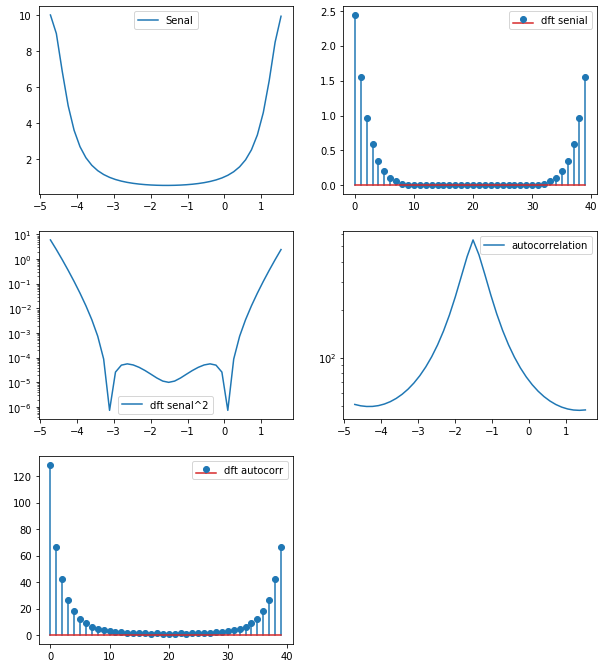

In [4]:
h = 40
t = linspace(pi/2 - 2*pi,pi/2 -(pi/(2*h)),h)

s = lambda t: 1/(1-0.9*sin(t))

def dft(lista):
    N=len(lista)
    lis = [0]*N
    for k in range(N):
        suma = 0
        for n in range(N):
            suma += exp(-2*pi*1j*n*k/N)*lista[n]
        lis[k]=abs(suma)
    return array(lis)/N


A = lambda s,t : convolve(s(t),s(t),mode='same')
corA = A(s,t)
dftA = dft(corA)

figure(figsize=(10,20))
subplot(5,2,1)
plot(t,s(t),label='Senal')
legend()
subplot(5,2,2)
stem(dft(s(t)),label='dft senial')
legend()
subplot(5,2,3)
semilogy(t,dft(s(t))**2, label = 'dft senal^2')
legend()
subplot(5,2,4)
semilogy(t,corA, label = 'autocorrelation')
legend()
subplot(5,2,5)
stem(dftA, label = 'dft autocorr')
legend()
savefig('potencias.png')

Noise

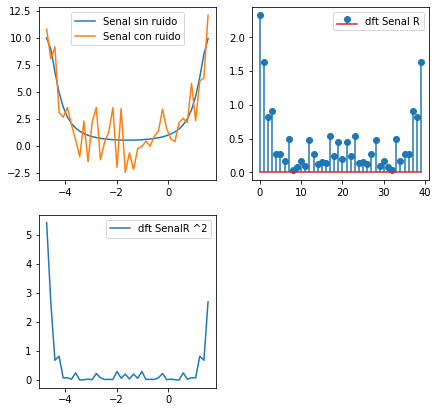

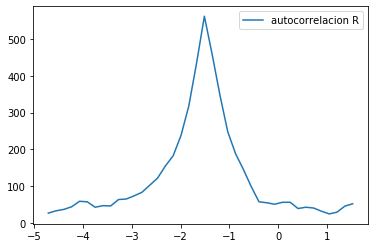

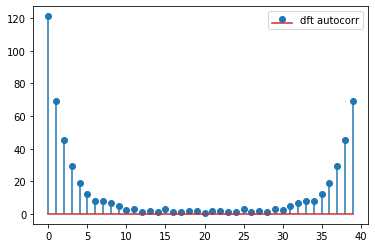

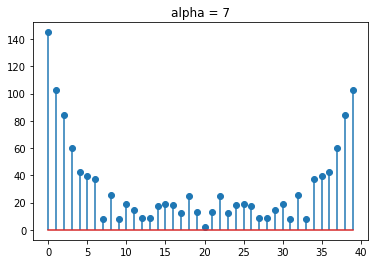

In [20]:
sn = lambda t,alp: s(t) + alp*(2*random(len(t))-1)
alpha = 3
pl = sn(t,alpha)

A1 = lambda sn,t,alp : convolve(sn(t,alp),sn(t,alp),mode='same')
corNois = A1(sn,t,1)
dftn = dft(corNois)

figure(figsize=(7,7))
subplot(2,2,1)
plot(t,s(t),label='Senal sin ruido')
plot(t,pl,label='Senal con ruido')
legend()
subplot(2,2,2)
stem(dft(pl),label='dft Senal R',use_line_collection=True)
legend()
subplot(2,2,3)
plot(t,(dft(pl))**2,label='dft SenalR ^2')
legend()
savefig('ruido.png')

figure()
plot(t,corNois,label='autocorrelacion R')
legend()
savefig('correlacion.png')
figure()
stem(dftn,label='dft autocorr',use_line_collection=True)
legend()
savefig('comparacion.png')



#alphaaaa

figure()
stem(dft(A1(sn,t,7)),use_line_collection=True)
title('alpha = 7')
savefig('alpha.png')